# Instacart By Ashok Kumar Narapasetty

Lets get an understanding of what our problem is:

## What is our target variable

We have to predict the list of products in users next orders.  
it is mentioned that users next orders will only contain prior products.  
So, For each product we need to check weather the user will reorder that product or not.
Our target variable is **reordered** which is either 0 or 1.  
So, This is a **classification problem**.

## Building Train and Test data

Train and Test data is not properly divided.  
So, we have to create Train and Test data using **eval_set** vatiable in **orders** dataset.

## 1. Lets begin with loading the required libraries and loading our data

In [1]:
import os
import glob
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
#os.chdir('../assets')
os.getcwd()

'/gpfs/global_fs01/sym_shared/YPProdSpark/user/se05-b574f15314feea-32f81314edb4/notebook/work'

In [4]:
for i in glob.glob('*.csv'):
    print(i)

insta_result.csv


In [5]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
departments = pd.read_csv('departments.csv')

In [7]:
order_products__prior = pd.read_csv('order_products__prior.csv')

In [8]:
order_products__train = pd.read_csv('order_products__train.csv')

In [9]:
orders = pd.read_csv('orders.csv')

In [10]:
products = pd.read_csv('products.csv')


## 2. Getting to know our Data Sets

In [11]:
print '__Dimensions of our Data Sets__'
print 'aisles'.ljust(30),aisles.shape
print 'departments'.ljust(30),departments.shape
print 'order_products__prior'.ljust(30),order_products__prior.shape
print 'order_products__train'.ljust(30),order_products__train.shape
print 'orders'.ljust(30),orders.shape
print 'products'.ljust(30),products.shape

__Dimensions of our Data Sets__
aisles                         (134, 2)
departments                    (21, 2)
order_products__prior          (32434489, 4)
order_products__train          (1384617, 4)
orders                         (3421083, 7)
products                       (49688, 4)


In [12]:
print('aisle Overview:')
aisles.head()

aisle Overview:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### creating a function to get aisle when aisle_id is passed

In [13]:
def get_aisle(id):
    return aisles[aisles['aisle_id'] == id].iloc[0,1]

In [14]:
print('departments Overview:')
departments.head()

departments Overview:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## creating a function to get aisle when aisle_id is passed

In [15]:
def get_department(id):
    return departments[departments['department_id'] == id].iloc[0,1]

## Now let's take a look at Products data set

In [16]:
print('products overview')
products.head()

products overview


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Here we can add **aisles** and **departmrnts** data sets to **products** data set using **aisle_id** and **department_id**

In [17]:
products['aisle'] = np.vectorize(get_aisle)(products['aisle_id'])

In [18]:
products['department'] = np.vectorize(get_department)(products['department_id'])

In [19]:
print('Products overview after adding aisle and department columns')
products.head()

Products overview after adding aisle and department columns


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


Now we can remove **aisles** and **departments**.

In [20]:
del (aisles, departments)

In [21]:
print('orders Overview')
orders.head()

orders Overview


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28


In [22]:
len(orders[orders['eval_set'] == 'test']['order_id'])

75000

**Orders** data set will show us the information of **orders given by users and their sequence**.

## Let's Know which Hour of the Day People place most of the orders

In [23]:
which_hour = orders.groupby(['order_hour_of_day'])['order_id'].count().reset_index()

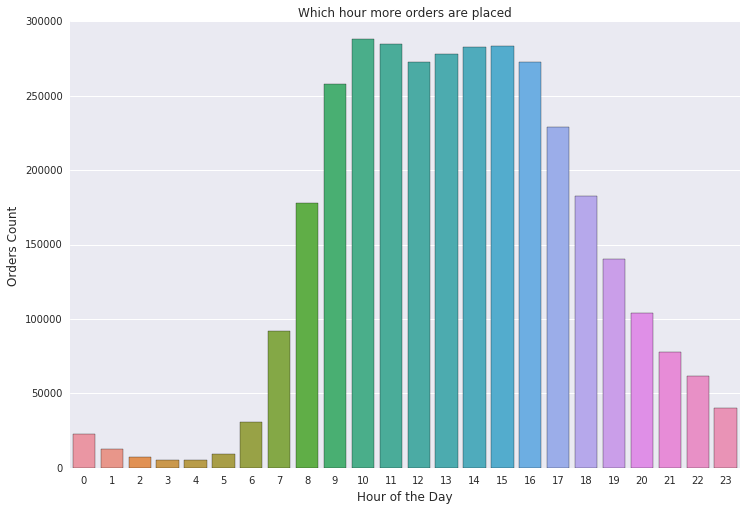

In [24]:
plt.figure(figsize = (12,8))
sns.barplot(which_hour.order_hour_of_day, which_hour.order_id)
plt.xlabel('Hour of the Day', fontsize = 12)
plt.ylabel('Orders Count', fontsize = 12)
plt.title('Which hour more orders are placed', fontsize = 12)
plt.show()
del which_hour

This shows that most of the orders will be placed during **8 AM to 6 PM**.

In [25]:
which_day = orders.groupby(['order_dow'])['order_id'].count().reset_index()

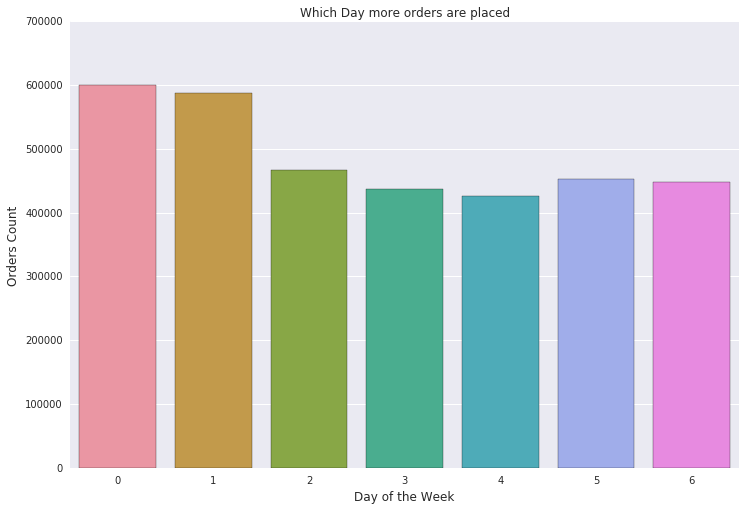

In [26]:
plt.figure(figsize = (12,8))
sns.barplot(which_day.order_dow, which_day.order_id)
plt.xlabel('Day of the Week', fontsize = 12)
plt.ylabel('Orders Count', fontsize = 12)
plt.title('Which Day more orders are placed', fontsize = 12)
plt.show()
del which_day

This shows that there will be **less orders in mid week days** and **more orders in weekends**.

**eval_set** variable in **Orders Data Frame** is our key to separate **Train**, **Test** an **Prior** data.

In [27]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

## Plotting Number of orders present in Prior, Train and Test

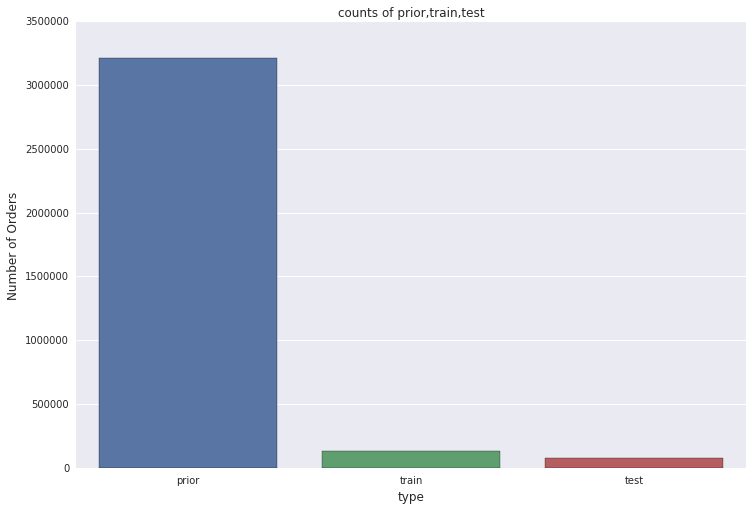

In [28]:
counts = pd.DataFrame(orders.eval_set.value_counts())

plt.figure(figsize = (12,8))
sns.barplot(counts.index, counts.eval_set)
plt.xlabel("type", fontsize = 12)
plt.ylabel("Number of Orders", fontsize = 12)
plt.title("counts of prior,train,test", fontsize = 12)
plt.show()
del counts

This Bar plot shows **Number of orders** present in each of **prior**, **train** and **test**.

In [29]:
orders.groupby(['eval_set'])['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

### From this we can say:  
* Total users     = 206209  
* Users in Train  = 131209  
* Users in Test   = 75000

## Plotting Number of Users present in Prior, Train and Test

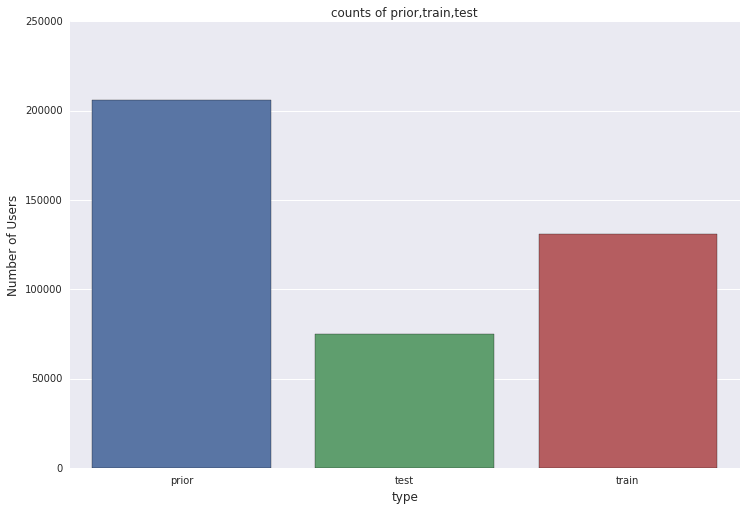

In [30]:
user_counts = pd.DataFrame(orders.groupby(['eval_set'])['user_id'].nunique())

plt.figure(figsize = (12,8))
sns.barplot(user_counts.index,user_counts.user_id)
plt.xlabel("type", fontsize = 12)
plt.ylabel("Number of Users", fontsize = 12)
plt.title("counts of prior,train,test", fontsize = 12)
plt.show()
del user_counts

In [31]:
print('order_products__prior Overview:')
order_products__prior.head()

order_products__prior Overview:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
print('order_products__prior Overview:')
order_products__prior.head()

order_products__prior Overview:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



## 3. Missing Value analysis

In [33]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

**days_since_prior_order** variable in **orders** data set has **206209 null values** because those are users **initial orders**

In [34]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [35]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [36]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
aisle            0
department       0
dtype: int64

So, there are no missing values except in orders['days_since_prior_order'].  
But, we should not remove these missing values because they represent **that particualr order is the users first order** and we can use this information later. 

## 4. Feature Engineering  

### Adding User ID to order_products_train

In [37]:
order_products_train = order_products__train.merge(orders[['order_id','user_id']], on = 'order_id', how = 'left')

In [38]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id
0,1,49302,1,1,112108
1,1,11109,2,1,112108
2,1,10246,3,0,112108
3,1,49683,4,0,112108
4,1,43633,5,1,112108


## Getting all the information of prior data we have together.

In [39]:
orders_products = orders.merge(order_products__prior, on = 'order_id', how = 'inner')

In [40]:
del order_products__prior

In [41]:
prd = orders_products.sort_values(['user_id', 'order_number', 'product_id'])

In [42]:
prd.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [43]:
prd['product_time'] = prd.groupby(['user_id','product_id'])['order_number'].cumcount(ascending=True)

In [44]:
prd.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_time
0,2539329,1,prior,1,2,8,NaN,196,1,0,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0,0
5,2398795,1,prior,2,3,7,15,196,1,1,1
6,2398795,1,prior,2,3,7,15,10258,2,0,0
7,2398795,1,prior,2,3,7,15,12427,3,1,1
10,2398795,1,prior,2,3,7,15,13032,6,0,0
8,2398795,1,prior,2,3,7,15,13176,4,0,0


## Creating new and useful features from prior data

In [45]:
def uni(a):
    return a.nunique()
def zer(a):
    return sum(a==0)
def one(a):
    return sum(a==1)
prd = prd.groupby('product_id').agg({'order_id':uni, 'reordered':sum, 'product_time':[zer,one]})
prd.columns = [' '.join(col).strip() for col in prd.columns.values]

In [46]:
prd.rename(columns = {'order_id uni':'prod_orders',
                      'product_time zer':'prod_first_orders',
                      'product_time one':'prod_second_orders',
                      'reordered sum':'prod_reorders'},inplace = True)

In [47]:
prd.head()

,prod_orders,prod_first_orders,prod_second_orders,prod_reorders
product_id,,,,
1,1852,716,276,1136
2,90,78,8,12
3,277,74,36,203
4,329,182,64,147
5,15,6,4,9


In [48]:
prd['prod_reorder_probability'] = prd.prod_second_orders / prd.prod_first_orders
prd['prod_reorder_times'] = 1 + prd.prod_reorders / prd.prod_first_orders
prd['prod_reorder_ratio'] = prd.prod_reorders / prd.prod_orders

In [49]:
prd.drop(prd[['prod_reorders','prod_first_orders','prod_second_orders']], axis=1, inplace=True)

In [50]:
prd = prd.reset_index()

In [51]:
prd.head()

,product_id,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio
0,1,1852,0.385475,2.586592,0.613391
1,2,90,0.102564,1.153846,0.133333
2,3,277,0.486486,3.743243,0.732852
3,4,329,0.351648,1.807692,0.446809
4,5,15,0.666667,2.500000,0.600000


# Creating Users Data

In [52]:
users = orders[orders['eval_set'] == 'prior']

In [53]:
def mean(a):
    return a.mean()

users = users.groupby(['user_id']).agg({'order_number':max,'days_since_prior_order':[sum,mean]}).reset_index()

users.columns = [' '.join(col).strip() for col in users.columns.values]
users.rename(columns = {'order_number max':'user_orders',
                        'days_since_prior_order sum':'user_period',
                        'days_since_prior_order mean':'user_mean_days_since_prior'},inplace = True)

In [54]:
users.head()

,user_id,user_period,user_mean_days_since_prior,user_orders
0,1,176,19.555556,10
1,2,198,15.230769,14
2,3,133,12.090909,12
3,4,55,13.750000,5
4,5,40,13.333333,4


In [55]:
def count(a):
    return a.count()
def unique(a):
    return a.nunique()
def equal(a):
    return sum(a == 1)
def grater(a):
    return sum(a > 1)

us = orders_products.groupby(['user_id']).agg({'order_id':count,'reordered':equal,'order_number':grater,'product_id':unique}).reset_index()

us['user_reorder_ratio'] = us.reordered/us.order_number
us.drop(us[['reordered','order_number']], axis = 1, inplace = True)
us.rename(columns = {'order_id':'user_total_products','product_id':'user_distinct_products'}, inplace = True)

In [56]:
us.head()

,user_id,user_total_products,user_distinct_products,user_reorder_ratio
0,1,59,18,0.759259
1,2,195,102,0.510989
2,3,88,33,0.705128
3,4,18,17,0.071429
4,5,37,23,0.538462


In [57]:
users = users.merge(us, on = 'user_id', how = 'inner')
users['user_average_basket'] = users.user_total_products / users.user_orders

In [58]:
users.head()

,user_id,user_period,user_mean_days_since_prior,user_orders,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket
0,1,176,19.555556,10,59,18,0.759259,5.900000
1,2,198,15.230769,14,195,102,0.510989,13.928571
2,3,133,12.090909,12,88,33,0.705128,7.333333
3,4,55,13.750000,5,18,17,0.071429,3.600000
4,5,40,13.333333,4,37,23,0.538462,9.250000


In [59]:
us = orders[orders['eval_set'] != 'prior']
us = us[['user_id', 'order_id', 'eval_set', 'days_since_prior_order']]
us.rename({'days_since_prior_order':'time_since_last_order'}, inplace = True)

In [60]:
users = users.merge(us, on = 'user_id', how = 'inner')

In [61]:
del us

# Creating Database with all information we have

In [62]:
def count(a):
    return a.count()
def first(a):
    return a.min()
def last(a):
    return a.max()
data = orders_products.groupby(['user_id','product_id']).agg({'order_id':count,
                                                              'order_number':[first,last],
                                                              'add_to_cart_order':mean}).reset_index()
data.columns = [' '.join(col).strip() for col in data.columns.values]

In [63]:
data.head()

,user_id,product_id,order_id count,add_to_cart_order mean,order_number first,order_number last
0,1,196,10,1.400000,1,10
1,1,10258,9,3.333333,2,10
2,1,10326,1,5.000000,5,5
3,1,12427,10,3.300000,1,10
4,1,13032,3,6.333333,2,10


In [64]:
data.rename(columns = {'order_id count':'up_orders',
                       'add_to_cart_order mean':'up_average_cart_position',
                       'order_number first':'up_first_order',
                       'order_number last':'up_last_order'}, inplace = True)

In [65]:
data.head()

,user_id,product_id,up_orders,up_average_cart_position,up_first_order,up_last_order
0,1,196,10,1.400000,1,10
1,1,10258,9,3.333333,2,10
2,1,10326,1,5.000000,5,5
3,1,12427,10,3.300000,1,10
4,1,13032,3,6.333333,2,10


In [66]:
data = data.merge(prd, on = 'product_id', how = 'inner')
data = data.merge(users, on = 'user_id', how = 'inner')

In [67]:
data.head()

,user_id,product_id,up_orders,up_average_cart_position,up_first_order,up_last_order,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_period,user_mean_days_since_prior,user_orders,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket,order_id,eval_set,days_since_prior_order
0,1,196,10,1.400000,1,10,35791,0.582500,4.473875,0.776480,176,19.555556,10,59,18,0.759259,5.9,1187899,train,14
1,1,10258,9,3.333333,2,10,1946,0.552962,3.493716,0.713772,176,19.555556,10,59,18,0.759259,5.9,1187899,train,14
2,1,10326,1,5.000000,5,5,5526,0.521581,2.873635,0.652009,176,19.555556,10,59,18,0.759259,5.9,1187899,train,14
3,1,12427,10,3.300000,1,10,6476,0.529482,3.857058,0.740735,176,19.555556,10,59,18,0.759259,5.9,1187899,train,14
4,1,13032,3,6.333333,2,10,3751,0.479782,2.916796,0.657158,176,19.555556,10,59,18,0.759259,5.9,1187899,train,14


In [68]:
data['up_order_rate'] = data.up_orders / data.user_orders
data['up_orders_since_last_order'] = data.user_orders - data.up_last_order
#data['up_order_rate_since_first_order'] = data.up_orders / (data.user_orders - data.up_first_order + 1)

In [69]:
data = data.merge(order_products_train[['user_id','product_id','reordered']], on = ['user_id','product_id'], how = 'left')

In [70]:
data.head()

,user_id,product_id,up_orders,up_average_cart_position,up_first_order,up_last_order,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,...,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket,order_id,eval_set,days_since_prior_order,up_order_rate,up_orders_since_last_order,reordered
0,1,196,10,1.400000,1,10,35791,0.582500,4.473875,0.776480,...,59,18,0.759259,5.9,1187899,train,14,1.0,0,1
1,1,10258,9,3.333333,2,10,1946,0.552962,3.493716,0.713772,...,59,18,0.759259,5.9,1187899,train,14,0.9,0,1
2,1,10326,1,5.000000,5,5,5526,0.521581,2.873635,0.652009,...,59,18,0.759259,5.9,1187899,train,14,0.1,5,NaN
3,1,12427,10,3.300000,1,10,6476,0.529482,3.857058,0.740735,...,59,18,0.759259,5.9,1187899,train,14,1.0,0,NaN
4,1,13032,3,6.333333,2,10,3751,0.479782,2.916796,0.657158,...,59,18,0.759259,5.9,1187899,train,14,0.3,0,1


In [71]:
del (order_products__train, prd, users)

we have created the data set with all the feature information we have. Now, let's create Test and Train Data sets from it.

## Creating Train and Test data sets

In [72]:
train = data[data['eval_set'] == 'train']

In [73]:
train.drop(train[['eval_set','user_id','product_id','order_id']], axis = 1, inplace = True)

/usr/local/src/bluemix_jupyter_bundle.v55/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
train = train.fillna({'reordered':0})

In [75]:
train.head()

,up_orders,up_average_cart_position,up_first_order,up_last_order,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_period,user_mean_days_since_prior,user_orders,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket,days_since_prior_order,up_order_rate,up_orders_since_last_order,reordered
0,10,1.400000,1,10,35791,0.582500,4.473875,0.776480,176,19.555556,10,59,18,0.759259,5.9,14,1.0,0,1
1,9,3.333333,2,10,1946,0.552962,3.493716,0.713772,176,19.555556,10,59,18,0.759259,5.9,14,0.9,0,1
2,1,5.000000,5,5,5526,0.521581,2.873635,0.652009,176,19.555556,10,59,18,0.759259,5.9,14,0.1,5,0
3,10,3.300000,1,10,6476,0.529482,3.857058,0.740735,176,19.555556,10,59,18,0.759259,5.9,14,1.0,0,0
4,3,6.333333,2,10,3751,0.479782,2.916796,0.657158,176,19.555556,10,59,18,0.759259,5.9,14,0.3,0,1


In [76]:
test = data[data['eval_set'] == 'test']

In [77]:
test = test.drop(test[['eval_set','user_id','reordered']], axis = 1)

In [78]:
test.head()

,product_id,up_orders,up_average_cart_position,up_first_order,up_last_order,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_period,user_mean_days_since_prior,user_orders,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket,order_id,days_since_prior_order,up_order_rate,up_orders_since_last_order
18,196,5,2.200,15,22,35791,0.582500,4.473875,0.776480,227,10.809524,22,72,13,0.867647,3.272727,2161313,7,0.227273,0
19,12427,10,2.100,1,20,6476,0.529482,3.857058,0.740735,227,10.809524,22,72,13,0.867647,3.272727,2161313,7,0.454545,2
20,1747,4,3.500,8,19,1448,0.393238,2.576512,0.611878,227,10.809524,22,72,13,0.867647,3.272727,2161313,7,0.181818,3
21,10441,8,2.375,1,22,2909,0.536332,3.355248,0.701959,227,10.809524,22,72,13,0.867647,3.272727,2161313,7,0.363636,0
22,11266,10,1.600,1,19,4081,0.596670,3.775208,0.735114,227,10.809524,22,72,13,0.867647,3.272727,2161313,7,0.454545,3


In [79]:
del data

In [80]:
train.columns

Index([u'up_orders', u'up_average_cart_position', u'up_first_order',
       u'up_last_order', u'prod_orders', u'prod_reorder_probability',
       u'prod_reorder_times', u'prod_reorder_ratio', u'user_period',
       u'user_mean_days_since_prior', u'user_orders', u'user_total_products',
       u'user_distinct_products', u'user_reorder_ratio',
       u'user_average_basket', u'days_since_prior_order', u'up_order_rate',
       u'up_orders_since_last_order', u'reordered'],
      dtype='object')

In [81]:
test.columns

Index([u'product_id', u'up_orders', u'up_average_cart_position',
       u'up_first_order', u'up_last_order', u'prod_orders',
       u'prod_reorder_probability', u'prod_reorder_times',
       u'prod_reorder_ratio', u'user_period', u'user_mean_days_since_prior',
       u'user_orders', u'user_total_products', u'user_distinct_products',
       u'user_reorder_ratio', u'user_average_basket', u'order_id',
       u'days_since_prior_order', u'up_order_rate',
       u'up_orders_since_last_order'],
      dtype='object')

## Preparing Model
### Converting Train and Test into arrays

In [82]:
ind_columns = train.drop(train[['reordered']], axis = 1).columns

In [83]:
train_ind = train.as_matrix(ind_columns)

In [84]:
train_dep = train.as_matrix(['reordered'])

In [85]:
test_columns = test.drop(test[['order_id','product_id']], axis = 1).columns

In [86]:
test_ind = test.as_matrix(test_columns)

## Decision Tree

In [87]:
from sklearn import tree

In [88]:
clf = tree.DecisionTreeClassifier()

In [89]:
clf = clf.fit(train_ind,train_dep)

In [90]:
prediction = clf.predict(test_ind)

In [91]:
prediction

array([ 0.,  1.,  0., ...,  0.,  1.,  1.])

In [92]:
test['reordered'] = prediction

In [93]:
test.head()

,product_id,up_orders,up_average_cart_position,up_first_order,up_last_order,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_period,...,user_orders,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket,order_id,days_since_prior_order,up_order_rate,up_orders_since_last_order,reordered
18,196,5,2.200,15,22,35791,0.582500,4.473875,0.776480,227,...,22,72,13,0.867647,3.272727,2161313,7,0.227273,0,0
19,12427,10,2.100,1,20,6476,0.529482,3.857058,0.740735,227,...,22,72,13,0.867647,3.272727,2161313,7,0.454545,2,1
20,1747,4,3.500,8,19,1448,0.393238,2.576512,0.611878,227,...,22,72,13,0.867647,3.272727,2161313,7,0.181818,3,0
21,10441,8,2.375,1,22,2909,0.536332,3.355248,0.701959,227,...,22,72,13,0.867647,3.272727,2161313,7,0.363636,0,0
22,11266,10,1.600,1,19,4081,0.596670,3.775208,0.735114,227,...,22,72,13,0.867647,3.272727,2161313,7,0.454545,3,0


In [94]:
result_file = test[test['reordered'] == 1]
result_file = result_file.groupby(['order_id'])['product_id'].unique().reset_index()
result_file = result_file.rename(columns = {'product_id':'products'})

In [95]:
result_file.head()

,order_id,products
0,17,"[47766, 39275, 48896]"
1,34,"[13176, 47792, 7948, 37947, 43504, 18618, 5242]"
2,137,"[24852, 14992, 21903, 29594, 24184, 44422, 441..."
3,182,"[5479, 44389, 38383]"
4,257,"[24852, 27966, 21137, 22035, 36929]"


In [96]:
final_result = pd.DataFrame({'order_id':orders[orders['eval_set'] == 'test'].order_id})
final_result = final_result.merge(result_file, on = 'order_id', how = 'left')
final_result = final_result.sort_values(['order_id'])
final_result = final_result.fillna({'products':'None'})

### Saving the final result

In [97]:
final_result.to_csv('insta_result.csv', index = False)